In [55]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\LucaH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data loading

In [57]:
#load all evaluation result datasets from csv

#1: gpt4o-mini-gui
df_gpt4o_mini_gui = pd.read_csv('./data/test_results_gpt4o-mini_gui.csv')

#2: gpt4o-gui
df_gpt4o_gui = pd.read_csv('./data/test_results_gpt4o_gui.csv')

# Data transformation

In [58]:
# add new column for model name
df_gpt4o_mini_gui['model'] = 'gpt4o-mini'
df_gpt4o_gui['model'] = 'gpt4o'

#add new column for difficulty based on the following rule
#task number 1 = easy, 2,3 = intermediate, 4 = hard
df_gpt4o_mini_gui['difficulty'] = 'easy'
df_gpt4o_gui['difficulty'] = 'easy'

df_gpt4o_mini_gui.loc[df_gpt4o_mini_gui['task_number'] == 2, 'difficulty'] = 'intermediate'
df_gpt4o_mini_gui.loc[df_gpt4o_mini_gui['task_number'] == 3, 'difficulty'] = 'intermediate'
df_gpt4o_mini_gui.loc[df_gpt4o_mini_gui['task_number'] == 4, 'difficulty'] = 'hard'

df_gpt4o_gui.loc[df_gpt4o_gui['task_number'] == 2, 'difficulty'] = 'intermediate'
df_gpt4o_gui.loc[df_gpt4o_gui['task_number'] == 3, 'difficulty'] = 'intermediate'
df_gpt4o_gui.loc[df_gpt4o_gui['task_number'] == 4, 'difficulty'] = 'hard'

In [59]:
#create new dataframe with all results
df = pd.concat([df_gpt4o_mini_gui, df_gpt4o_gui])

In [60]:
#drop columns "task_number", "timestamp", "seed", "exercise_count"
df = df.drop(columns=['task_number', 'timestamp', 'seed', 'exercise_count'])

In [61]:
#set all NaN values in the "tests_passed_percent" column to 0
df['tests_passed_percent'] = df['tests_passed_percent'].fillna(0)

#add new column "test_passed_50%" for each row that has a score of 50% or higher on test_passed_percent
df['test_passed_50%'] = df['tests_passed_percent'] >= 50

#divide test_passed_percent by 100 to get a percentage value
df['tests_passed_percent'] = df['tests_passed_percent'] / 100

In [62]:
df.head()

,student_submission,task_name,unique_id,test_passed,tests_passed_percent,pylint_score,cyclomatic_complexity,model,difficulty,test_passed_50%
0,submission_12,rna_transcription,f7e7fc57-6e5b-4b67-a71f-eef896940cef,True,1.0,8.33,6.0,gpt4o-mini,easy,True
1,submission_12,etl,f7e7fc57-6e5b-4b67-a71f-eef896940cef,True,1.0,6.67,3.0,gpt4o-mini,intermediate,True
2,submission_12,allergies,f7e7fc57-6e5b-4b67-a71f-eef896940cef,False,0.0,NaN,NaN,gpt4o-mini,intermediate,False
3,submission_12,simple_cipher,f7e7fc57-6e5b-4b67-a71f-eef896940cef,False,0.0,NaN,NaN,gpt4o-mini,hard,False
4,submission_13,gigasecond,4070dcf0-93ad-4209-b6f5-79d4b3236164,True,1.0,0.00,1.0,gpt4o-mini,easy,True


# Analysis

## Tests passed by model

C:\Users\LucaH\AppData\Local\Temp\ipykernel_131732\2645179518.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['difficulty', 'model'])['test_passed'].mean().unstack() * 100


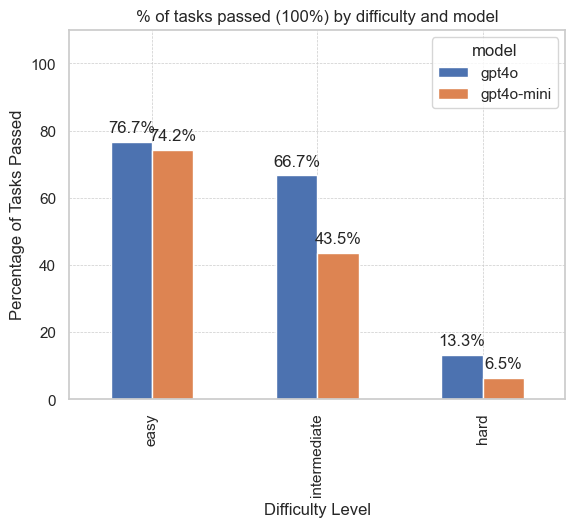

In [79]:
# Set the order of difficulty labels
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['easy', 'intermediate', 'hard'], ordered=True)

# Group by difficulty and model, then plot
df_grouped = df.groupby(['difficulty', 'model'])['test_passed'].mean().unstack() * 100
ax = df_grouped.plot(kind='bar')
ax.set_ylim(0, 110)
ax.set_ylabel('Percentage of tasks passed')
ax.set_title('% of tasks passed (100%) by difficulty and model')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Percentage of Tasks Passed')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

C:\Users\LucaH\AppData\Local\Temp\ipykernel_131732\2906987266.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['difficulty', 'model'])['tests_passed_percent'].mean().unstack() * 100


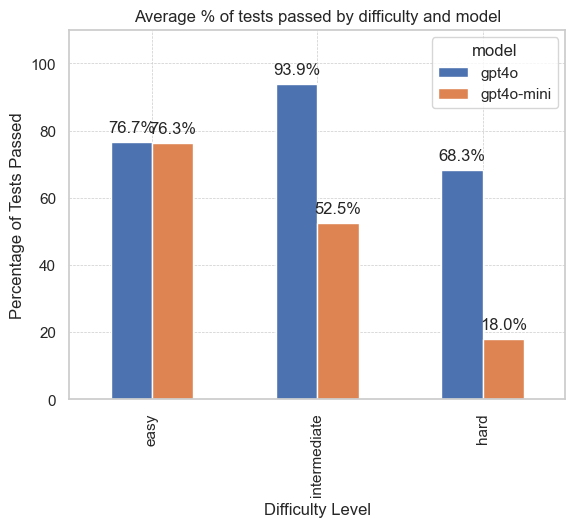

In [78]:
# Set the order of difficulty labels
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['easy', 'intermediate', 'hard'], ordered=True)

# Group by difficulty and model, then plot
df_grouped = df.groupby(['difficulty', 'model'])['tests_passed_percent'].mean().unstack() * 100
ax = df_grouped.plot(kind='bar')
ax.set_ylim(0, 110)
ax.set_ylabel('Percentage of tasks passed')
ax.set_title('Average % of tests passed by difficulty and model')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Percentage of Tests Passed')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Tests passed (>= 50%) by model

C:\Users\LucaH\AppData\Local\Temp\ipykernel_131732\2718034768.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['difficulty', 'model'])['test_passed_50%'].mean().unstack() * 100


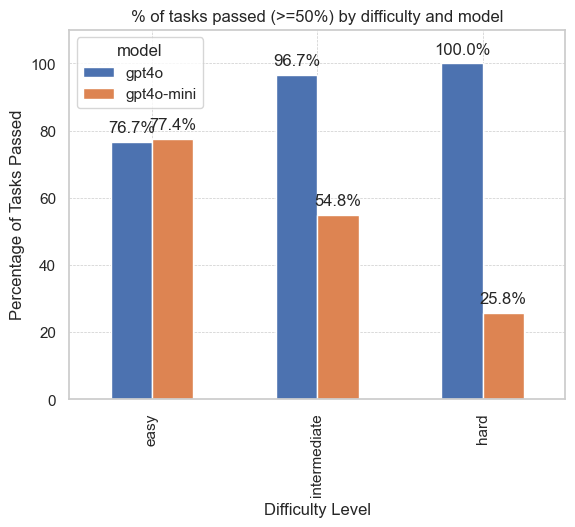

In [77]:
# Set the order of difficulty labels
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['easy', 'intermediate', 'hard'], ordered=True)

# Group by difficulty and model, then plot
df_grouped = df.groupby(['difficulty', 'model'])['test_passed_50%'].mean().unstack() * 100
ax = df_grouped.plot(kind='bar')
ax.set_ylim(0, 110)
ax.set_ylabel('Percentage of tasks passed')
ax.set_title('% of tasks passed (>=50%) by difficulty and model')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Percentage of Tasks Passed')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [96]:
# Now create a table with the average % of tests passed, % of tasks passed and % of tasks passed with 50% or more
df_grouped = df.groupby(['model'])[['tests_passed_percent', 'test_passed', 'test_passed_50%']].mean() * 100
df_grouped = df_grouped.round(2)

# Rename the columns
df_grouped = df_grouped.rename(columns={
    'tests_passed_percent': 'Average % of Tests Passed',
    'test_passed': 'Average % of Tasks Passed (=100% tests)',
    'test_passed_50%': 'Average % of Tasks Passed (>= 50% tests)'
})

# Add percentage sign to the values
df_grouped = df_grouped.applymap(lambda x: f'{x}%')

# Transpose the table
df_grouped = df_grouped.transpose()

df_grouped
# Add a model "students" with no values
df_grouped['students'] = ''
df_grouped

C:\Users\LucaH\AppData\Local\Temp\ipykernel_131732\3640648401.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped = df_grouped.applymap(lambda x: f'{x}%')


model,gpt4o,gpt4o-mini,students
Average % of Tests Passed,83.21%,49.83%,
Average % of Tasks Passed (=100% tests),55.83%,41.94%,
Average % of Tasks Passed (>= 50% tests),92.5%,53.23%,


## PyLint Score and Cyclomatic Complexity

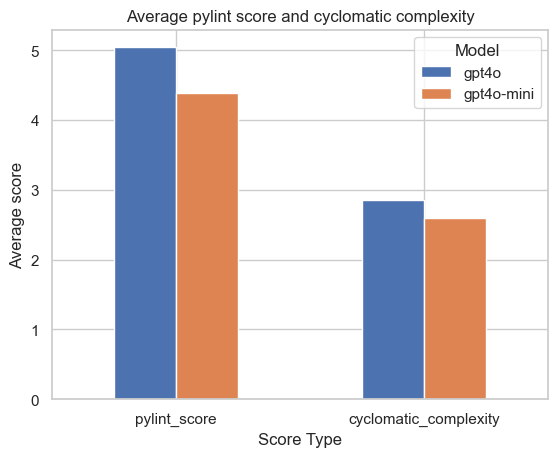

In [84]:
# Transpose and reformat the data for plotting
df_grouped = df.groupby(['model'])[['pylint_score', 'cyclomatic_complexity']].mean().T
df_grouped.plot(kind='bar')

plt.ylabel('Average score')
plt.title('Average pylint score and cyclomatic complexity')
plt.xticks(rotation=0)
plt.xlabel('Score Type')
plt.legend(title='Model', loc='best')  # Models will be shown in the legend
plt.show()


## Task

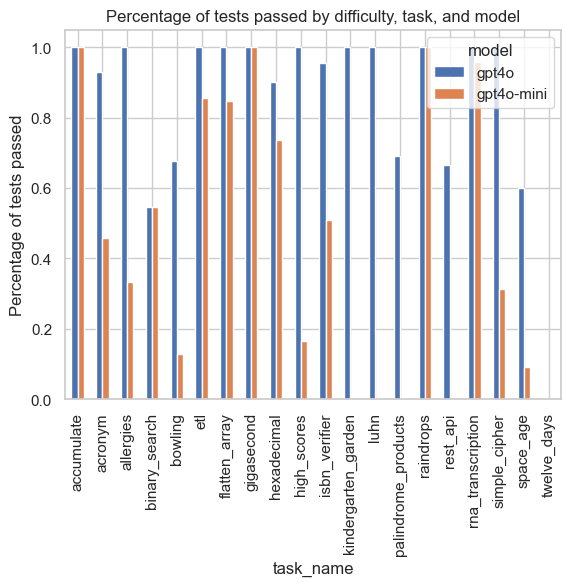

In [85]:
# Group by difficulty, task_name, and model, then plot
df_grouped = df.groupby(['task_name', 'model'])['tests_passed_percent'].mean().unstack()
df_grouped.plot(kind='bar')

plt.ylabel('Percentage of tests passed')
plt.title('Percentage of tests passed by difficulty, task, and model')
plt.show()


C:\Users\LucaH\AppData\Local\Temp\ipykernel_131732\2488046299.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['difficulty', 'task_name', 'model'])['tests_passed_percent'].mean().unstack().dropna(how='all')


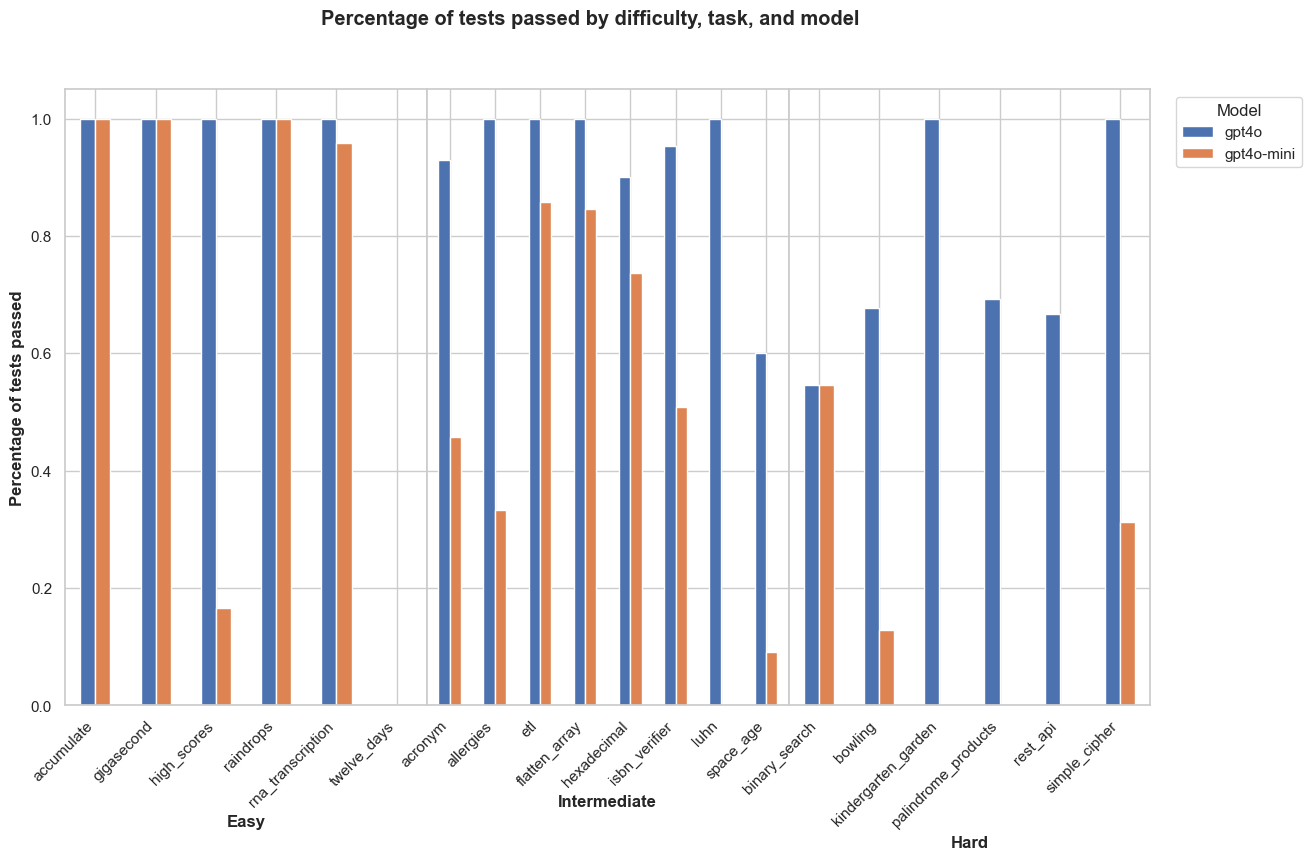

In [86]:
import matplotlib.pyplot as plt

# Group and pivot data for plotting, dropping rows with all NaN values
df_grouped = df.groupby(['difficulty', 'task_name', 'model'])['tests_passed_percent'].mean().unstack().dropna(how='all')

# Define plot function to create individual subplots with unstacked bars
def plot_function(difficulty, ax):
    # Select data for the specific difficulty
    ax = graph[difficulty]
    # Plotting data using bar chart with unstacked bars for each model
    df_plot = df_grouped.xs(difficulty)
    df_plot = df_plot.dropna(how='all')  # Drop empty rows for the specific difficulty
    df_plot.plot(kind='bar', ax=ax, legend=False)
    ax.set_xticklabels(df_plot.index.get_level_values('task_name'), rotation=45, ha='right')  # Set task names as x-tick labels
    ax.set_xlabel(difficulty.capitalize(), fontsize=12, weight='bold')  # Set x-axis label to 'easy', 'intermediate', or 'hard'

# Set up the subplots
unique_difficulties = df['difficulty'].unique()
n_subplots = len(unique_difficulties)
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(14, 8))  # width, height

# Create a mapping of difficulties to axes
graph = dict(zip(unique_difficulties, axes))
plots = list(map(lambda x: plot_function(x, graph[x]), graph))

# Common plot settings
plt.subplots_adjust(wspace=0)
axes[0].set_ylabel('Percentage of tests passed', weight='bold')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Percentage of tests passed by difficulty, task, and model', weight='bold')
plt.show()
